In [1]:
import pandas as pd
import pickle
import numpy as np
import statsmodels.api as sm
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('../kaggle_data/input/train.csv')
weather = pd.read_csv('../kaggle_data/input/weather.csv')
spray = pd.read_csv('../kaggle_data/input/spray.csv')

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('WnvPresent', axis = 'columns'),
                                                    df['WnvPresent'], test_size = .25,
                                                    stratify = df['WnvPresent'],
                                                    random_state = 1738)

In [5]:
import numpy as np
print(df.WnvPresent.mean())
print(np.mean(y_test))
print(np.mean(y_train))

0.05244622120692937
0.0525314046440807
0.052417819520243686


In [6]:
import pickle
train = [X_train, y_train]
test = [X_test, y_test]

'''
with open('trainOrig.pickle', 'wb') as f:
    pickle.dump(train, f, protocol=0)

with open('test.pickle', 'wb') as f:
    pickle.dump(test, f, protocol = 0)
'''

"\nwith open('trainOrig.pickle', 'wb') as f:\n    pickle.dump(train, f, protocol=0)\n\nwith open('test.pickle', 'wb') as f:\n    pickle.dump(test, f, protocol = 0)\n"

In [7]:
with open('trainOrig.pickle', 'rb') as f:
    train = pickle.load(f)

X_train = train[0]
y_train = train[1]
df = pd.concat([X_train, y_train], axis = 'columns')

### Working with training Data

- Ensure that Trap and Addresses, and Lat Long match up
- Change date to pd.as_datetime
- Get rid of redundant location information --- Maybe create a separate table / dictionary that gives address / lat long info per trap

In [44]:

df.Date = pd.to_datetime(df.Date)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7879 entries, 1379 to 9570
Data columns (total 13 columns):
Date                      7879 non-null datetime64[ns]
Address                   7879 non-null object
Species                   7879 non-null object
Block                     7879 non-null int64
Street                    7879 non-null object
Trap                      7879 non-null object
AddressNumberAndStreet    7879 non-null object
Latitude                  7879 non-null float64
Longitude                 7879 non-null float64
AddressAccuracy           7879 non-null int64
NumMosquitos              7879 non-null int64
WnvPresent                7879 non-null int64
Ones                      7879 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 1.2+ MB


In [9]:
print(df.columns, df.shape)

df.head(4)

Index(['Date', 'Address', 'Species', 'Block', 'Street', 'Trap',
       'AddressNumberAndStreet', 'Latitude', 'Longitude', 'AddressAccuracy',
       'NumMosquitos', 'WnvPresent'],
      dtype='object') (7879, 12)


,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
1379,2007-08-02,"5000 South Union Avenue, Chicago, IL 60609, USA",CULEX RESTUANS,50,S UNION AVE,T082,"5000 S UNION AVE, Chicago, IL",41.803423,-87.642984,8,3,0
2704,2007-08-24,"6600 South Kilpatrick Avenue, Chicago, IL 6062...",CULEX PIPIENS,66,S KILPATRICK AVE,T156,"6600 S KILPATRICK AVE, Chicago, IL",41.772846,-87.740029,9,3,0
4742,2009-07-17,"1700 West 95th Street, Chicago, IL 60643, USA",CULEX PIPIENS/RESTUANS,17,W 95TH ST,T094,"1700 W 95TH ST, Chicago, IL",41.720848,-87.666014,9,4,0
3107,2007-09-12,"2700 South Western Avenue, Chicago, IL 60608, USA",CULEX PIPIENS/RESTUANS,27,S WESTERN AVE,T034,"2700 S WESTERN AVE, Chicago, IL",41.843811,-87.686763,9,1,0


In [45]:

df.groupby(['Address','Date','Species']).count()['Block'].value_counts()
"""This might seem wierd but what I'm doing here is just counting the number of entries that have the same address,
date and species.  I wanted to see if they were testing some places more then once per day for the same species.  
The most number of times a single site is tested is 39.""";


In [11]:
y = df.WnvPresent
df['Ones'] = 1
X = np.asarray(df[['Species', 'Ones']])

# model = sm.Logit(y, X)

In [12]:


df.NumMosquitos.describe()

count    7879.000000
mean       12.992512
std        16.174892
min         1.000000
25%         2.000000
50%         5.000000
75%        17.000000
max        50.000000
Name: NumMosquitos, dtype: float64

In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
df.groupby('Species')['WnvPresent'].mean()

Species
CULEX ERRATICUS           0.000000
CULEX PIPIENS             0.087042
CULEX PIPIENS/RESTUANS    0.055602
CULEX RESTUANS            0.017544
CULEX SALINARIUS          0.000000
CULEX TARSALIS            0.000000
CULEX TERRITANS           0.000000
Name: WnvPresent, dtype: float64

In [15]:
df.Species.value_counts()

CULEX PIPIENS/RESTUANS    3597
CULEX PIPIENS             2045
CULEX RESTUANS            1995
CULEX TERRITANS            169
CULEX SALINARIUS            68
CULEX TARSALIS               4
CULEX ERRATICUS              1
Name: Species, dtype: int64

### Working with Spray Data

- Conversion of Date / time to date time objects
- Determine how many spray locations there are. Group them somehow? Look at spary map?

In [16]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [17]:
spray['location'] = spray.groupby(['Latitude','Longitude']).grouper.group_info[0]
spray.head()

,Date,Time,Latitude,Longitude,location
0,2011-08-29,6:56:58 PM,42.391623,-88.089163,14231
1,2011-08-29,6:57:08 PM,42.391348,-88.089163,14227
2,2011-08-29,6:57:18 PM,42.391022,-88.089157,14220
3,2011-08-29,6:57:28 PM,42.390637,-88.089158,14215
4,2011-08-29,6:57:38 PM,42.390410,-88.088858,14213


In [18]:
len(spray.location.unique()),spray.location.shape[0]
#so the spraying almost never takes place at the same location twice.

(14294, 14835)

In [19]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 5 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
location     14835 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 579.6+ KB


### Working with Weather Data

- Date Time Conversion
- Location Data for stations
- conversion of objects into int


In [20]:
# print(weather.columns)
# weather.head()

# # weather.SnowFall.value_counts()

weather.Date = pd.to_datetime(weather.Date)

print(weather.Date.dtype)
weather.head()

datetime64[ns]


,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [34]:
weather = weather[weather.Tavg!="M"]
weather.Tavg = weather.Tavg.astype(int)


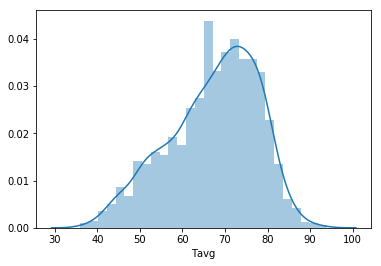

In [35]:
sns.distplot(weather.Tavg.astype(int))

In [22]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2933 entries, 0 to 2943
Data columns (total 22 columns):
Station        2933 non-null int64
Date           2933 non-null datetime64[ns]
Tmax           2933 non-null int64
Tmin           2933 non-null int64
Tavg           2933 non-null object
Depart         2933 non-null object
DewPoint       2933 non-null int64
WetBulb        2933 non-null object
Heat           2933 non-null object
Cool           2933 non-null object
Sunrise        2933 non-null object
Sunset         2933 non-null object
CodeSum        2933 non-null object
Depth          2933 non-null object
Water1         2933 non-null object
SnowFall       2933 non-null object
PrecipTotal    2933 non-null object
StnPressure    2933 non-null object
SeaLevel       2933 non-null object
ResultSpeed    2933 non-null float64
ResultDir      2933 non-null int64
AvgSpeed       2933 non-null object
dtypes: datetime64[ns](1), float64(1), int64(5), object(15)
memory usage: 607.0+ KB


### Looking at where trap Nums and Addresses do not Align

In [23]:
len(df.Trap.value_counts())

136

In [24]:
len(df.AddressNumberAndStreet.value_counts())

138

In [25]:
dup = pd.DataFrame(df.groupby(['Trap','AddressNumberAndStreet']).count())

In [26]:
dup.index.labels[1]

FrozenNDArray([70, 72, 79, 83, 99, 97, 103, 115, 132, 133, 60, 100, 102, 107, 123, 118, 98, 19, 65, 82, 94, 96, 1, 84, 24, 49, 52, 87, 75, 113, 29, 38, 53, 54, 27, 48, 12, 17, 16, 37, 47, 39, 35, 44, 41, 59, 63, 90, 112, 119, 42, 89, 101, 124, 0, 67, 80, 93, 106, 110, 117, 121, 71, 85, 122, 34, 6, 40, 2, 5, 10, 13, 14, 30, 136, 56, 43, 127, 130, 137, 3, 11, 125, 88, 18, 45, 91, 74, 4, 92, 69, 109, 55, 77, 73, 50, 120, 26, 32, 114, ...], dtype='int16')

### Example of bringing in map data

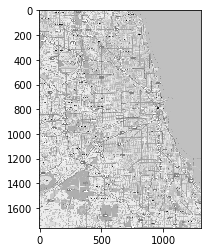

In [27]:
import numpy as np
import matplotlib.pyplot as plt

mapdata = np.loadtxt("../kaggle_data/input/mapdata_copyright_openstreetmap_contributors.txt")
plt.imshow(mapdata, cmap = plt.get_cmap('gray'))
plt.savefig('map.png')

In [28]:
plt.show()

## simple comparison of date to number in traps

In [43]:
weather.Tavg.head()